In [1]:
import time
import pickle
import numpy as np
from src.environment import StockTradingEnvironment
from src.utils import save_pickle, load_pickle, plot_grid
from src.learner import q_learning_learning_loop

#### Q-Learning

In [8]:
# NOTE: You can adjust the parameter 'number_of_days_to_consider'

stock_trading_environment = StockTradingEnvironment('./NVDA.csv', number_of_days_to_consider=5)

In [9]:
agent, reward_across_episodes, epsilons_across_episodes = q_learning_learning_loop(stock_trading_environment,learning_rate=0.5, discount_factor=0.9, 
                                                                        episodes=1000, min_epsilon_allowed=0.05, initial_epsilon_value=1)

Initial Q-Table; [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Trained Q-Table; [[14.90061733 -8.72944993  7.65003741]
 [-5.06312162  9.39502318  9.61648874]
 [ 9.83338603  2.50465934  4.81368902]
 [ 2.01211295  8.68054276  6.36443839]]


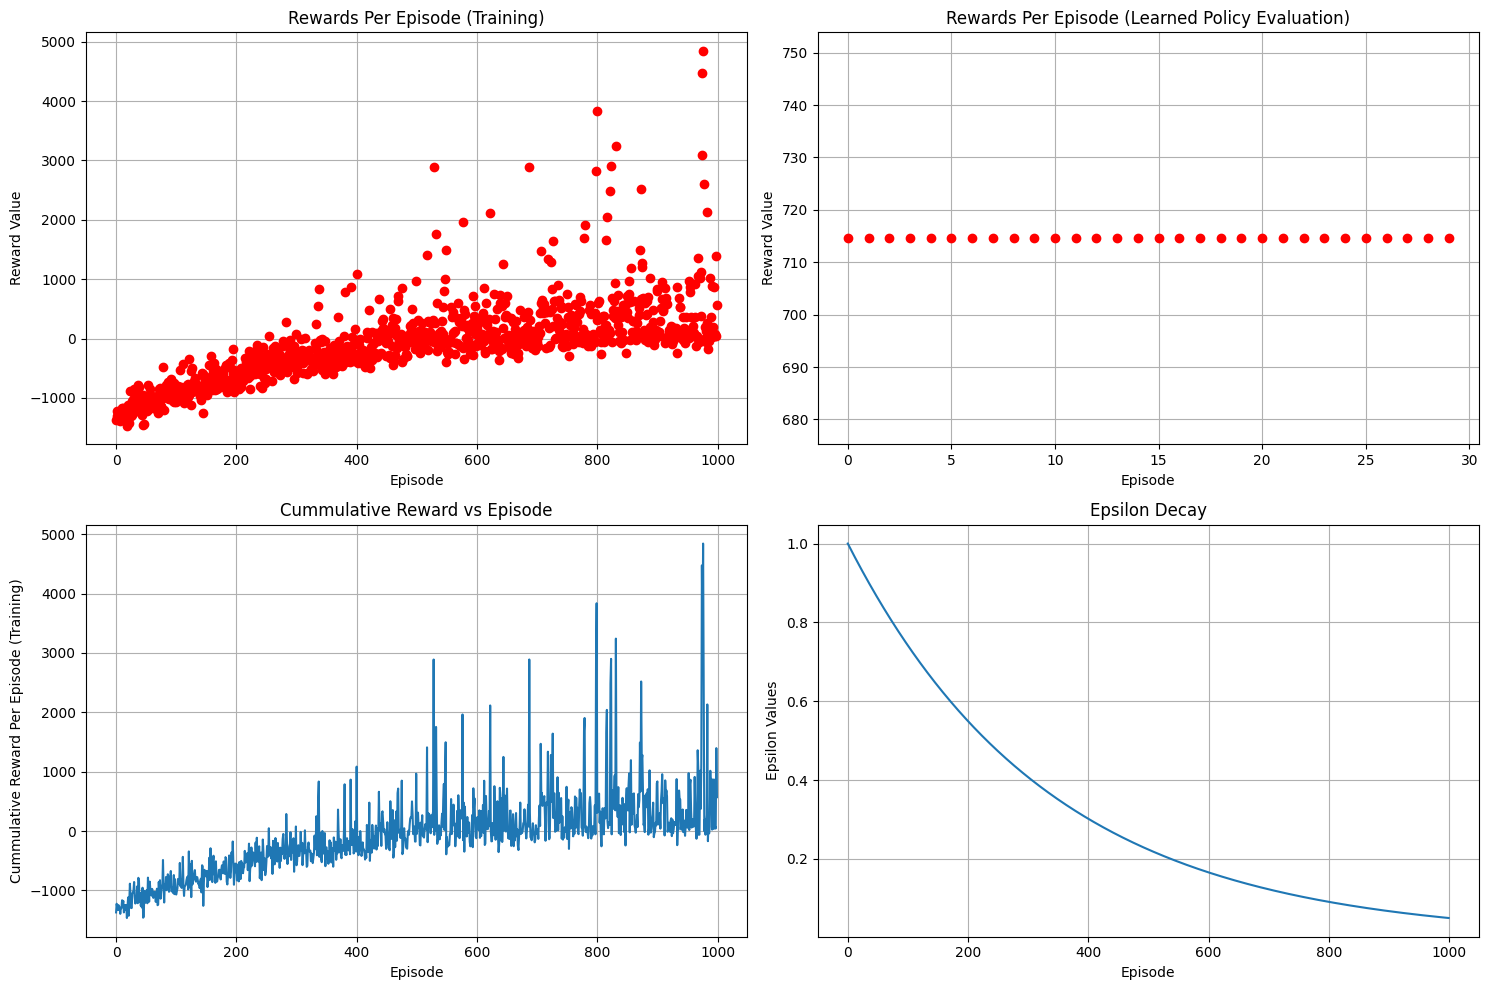

In [10]:
plot_grid(stock_trading_environment, agent, reward_across_episodes, epsilons_across_episodes)

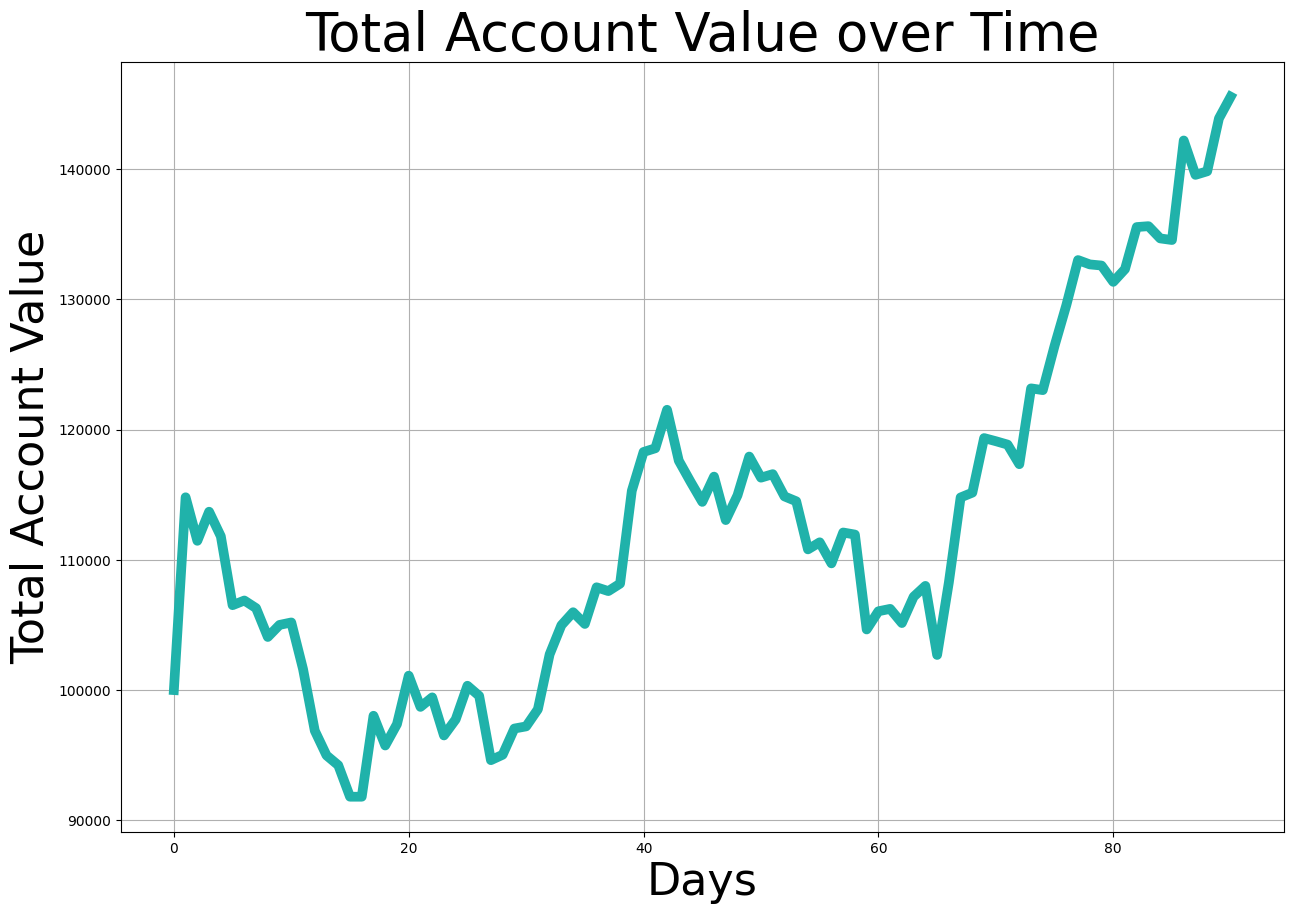

In [11]:
stock_trading_environment = StockTradingEnvironment('./NVDA.csv', number_of_days_to_consider=10)
stock_trading_environment.train = False
obs, _ = stock_trading_environment.reset()
terminated, truncated = False, False
while not terminated:
    action = np.argmax(agent.q_table[np.argmax(obs),:])
    obs, reward, terminated, truncated, info = stock_trading_environment.step(action)

stock_trading_environment.render()

In [13]:
save_pickle(agent, 'stock_env_q_learning_agent.pkl')

pickle file saved!!!!


#### Forecast

In [15]:
agent = load_pickle("stock_env_q_learning_agent.pkl")

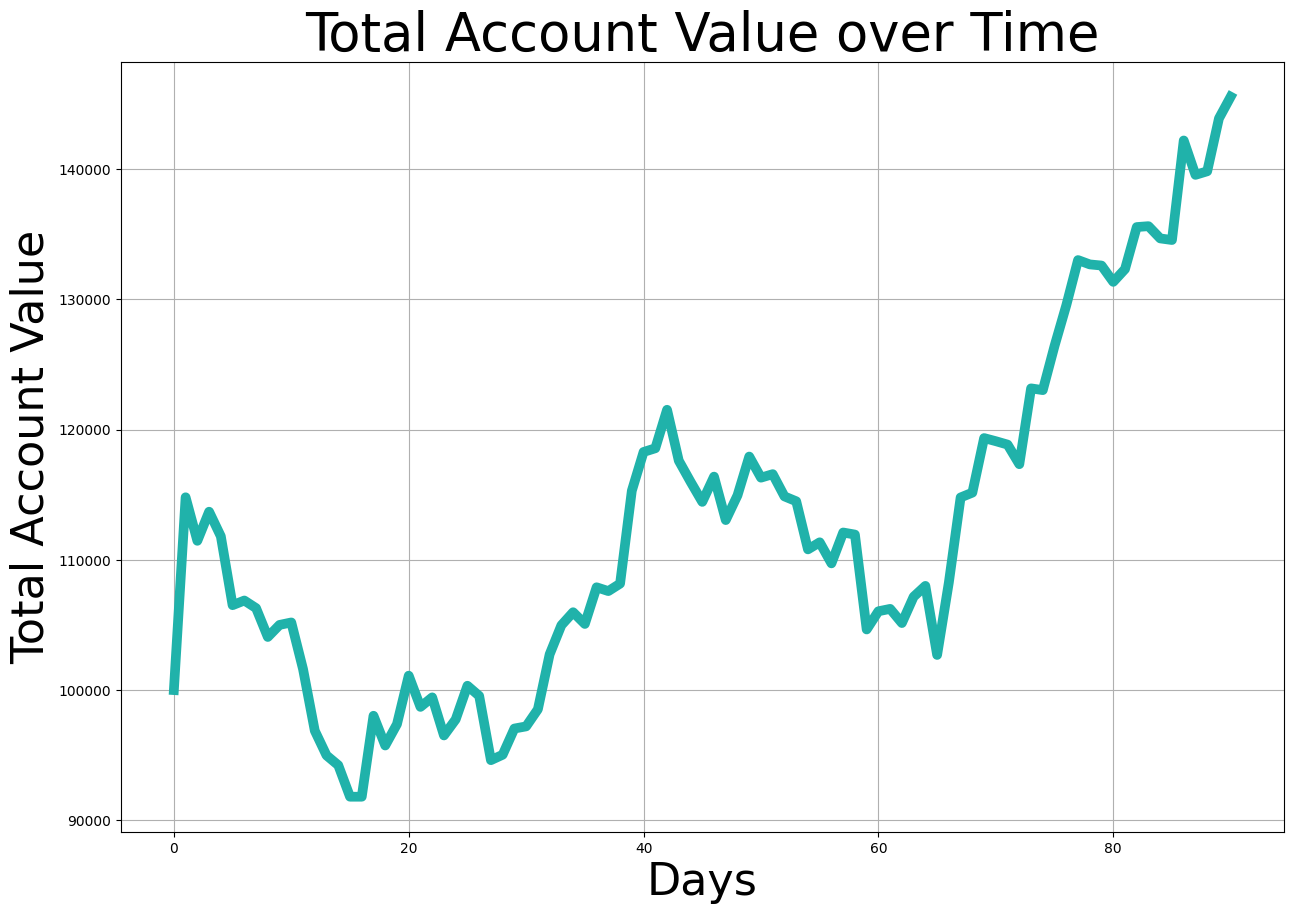

In [16]:
stock_trading_environment = StockTradingEnvironment('./NVDA.csv', number_of_days_to_consider=10)
stock_trading_environment.train = False
obs, _ = stock_trading_environment.reset()
terminated, truncated = False, False
while not terminated:
    action = np.argmax(agent.q_table[np.argmax(obs),:])
    obs, reward, terminated, truncated, info = stock_trading_environment.step(action)

stock_trading_environment.render()